# A Research on a Finnish Peatland (Lettosuo)

# 1Background Study

In [1]:
# Packages for Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import ipyleaflet

import plotly
import plotly.plotly as py
import plotly.offline as offline
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import pylab # qq plot visualization
import scipy.stats as stats

from IPython.display import Image # Image upload

import warnings
warnings.simplefilter("ignore")

#!pip install cufflinks
#!pip install --upgrade pip
#!pip install ipyleaflet
#!jupyter nbextension enable --py --sys-prefix ipyleaflet

# 2 Study Site and Experimental Design

In [2]:
lettosuo = pd.read_excel("Lettosuo.xlsx") # Dataset reading
#lettosuo.head()
#lettosuo.tail()
#lettosuo.shape
#lettosuo.info()
#lettosuo.columns

In [3]:
# Geographic location of the study site
letto =[go.Scattermapbox(lat=lettosuo["Latitude"], lon=lettosuo["Longitude"],
                         mode="markers", marker=dict(size=20, color="red", opacity=.8),)]
layout = go.Layout(autosize=False, mapbox=dict(accesstoken="pk.eyJ1Ijoidnl0aGFuaDE1NiIsImEiOiJjamx2NHZkc2QwczY1M3dxcGhycHYzY2o3In0.gaZL343YTQZqk1WuGdfGXw",
                                               bearing=10,pitch=60, zoom=13,center= dict(lat=60.64510,lon=23.95583),),
                   width=900,height=600, title = " Data sampling plots at the study site (Lettosuo), Finland")

fig = dict(data=letto, layout=layout)
iplot(fig)

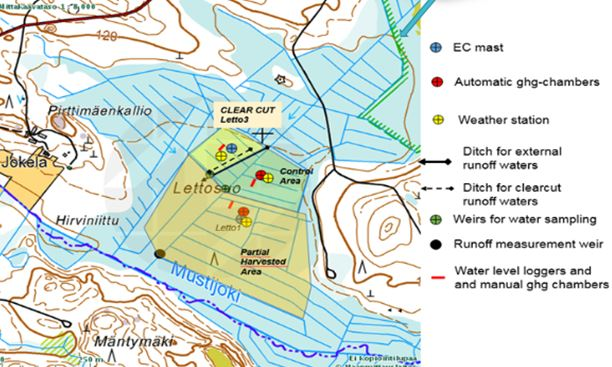

In [4]:
Image(filename="Letto_photo.JPG", width=1000,height=800)

In [5]:
from ipyleaflet import (Map,DrawControl)
myMap=Map(center=[60.642393, 23.957209],zoom=12)
dc=DrawControl(circle={"shapeOptions":{"color":"#0000FF"}})
myMap.add_control(dc)
myMap

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

# 3 Analysis

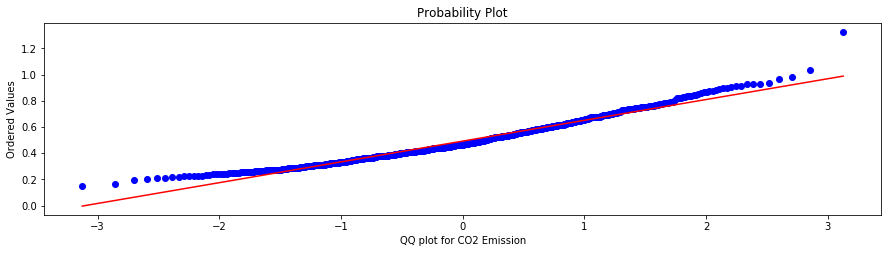

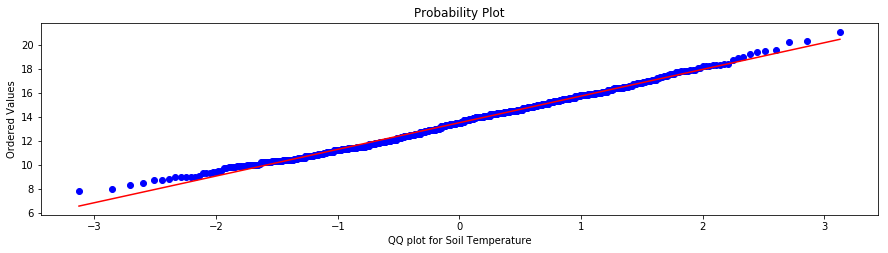

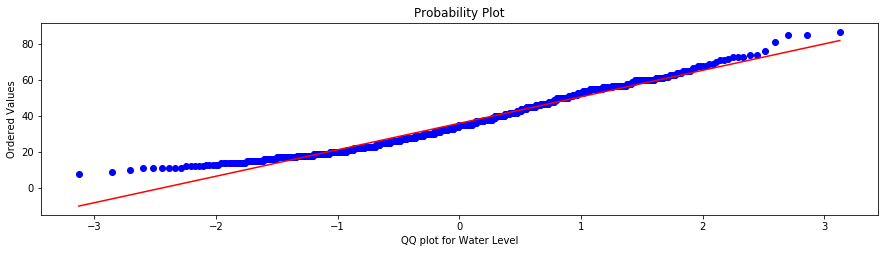

In [6]:
# QQ plot for normality observation 
fig=plt.figure(figsize=(15,12))
plt.subplot(3,1,1)
stats.probplot(lettosuo.CO2, dist="norm", plot=pylab)
plt.xlabel("QQ plot for CO2 Emission")
pylab.show()

plt.figure(figsize=(15,12))
plt.subplot(3,1,2)
stats.probplot(lettosuo.Soil_Tem, dist="norm", plot=pylab)
plt.xlabel("QQ plot for Soil Temperature")
pylab.show()

plt.figure(figsize=(15,12))
plt.subplot(3,1,3)
stats.probplot(lettosuo.Water_L, dist="norm", plot=pylab)
plt.xlabel("QQ plot for Water Level")
pylab.show()


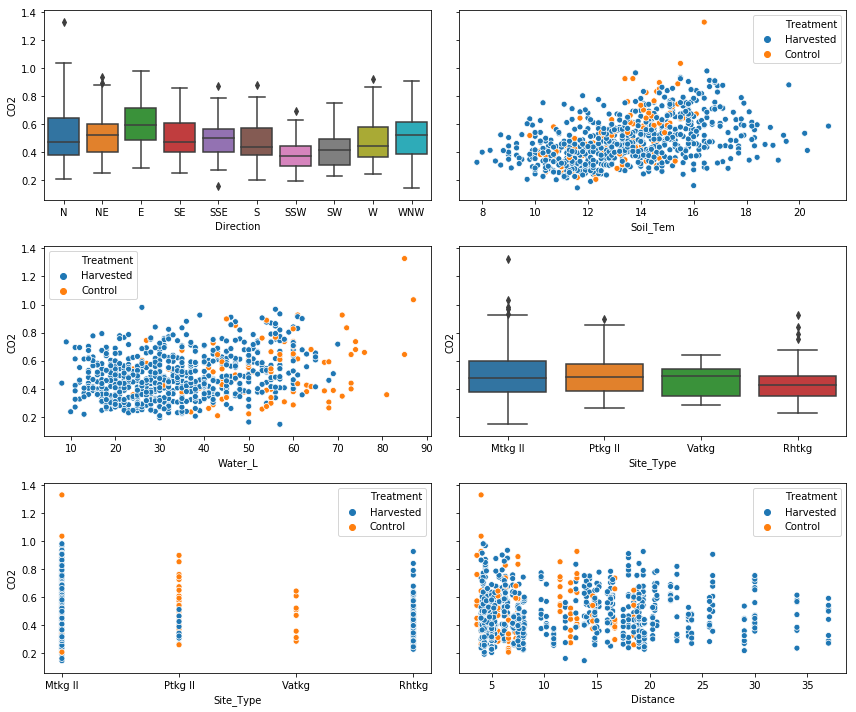

In [7]:
# Figure-level and axes-level functions
f, axes = plt.subplots(3, 2, sharey=True, figsize=(12, 10))
sns.boxplot(x="Direction", y="CO2", data=lettosuo, ax=axes[0,0])
sns.scatterplot(x="Soil_Tem", y="CO2", hue="Treatment", data=lettosuo, ax=axes[0,1])


sns.scatterplot(x="Water_L", y="CO2", hue="Treatment", data=lettosuo, ax=axes[1,0])

sns.boxplot(x="Site_Type", y="CO2", data=lettosuo, ax=axes[1,1])
sns.scatterplot(x="Site_Type", y="CO2", hue="Treatment", data=lettosuo, ax=axes[2,0])

sns.scatterplot(x="Distance", y="CO2", hue="Treatment", data=lettosuo, ax=axes[2,1])

plt.tight_layout()
plt.show()

# 3.1 GroupBy for the whole Dataset

In [8]:
#Groupby based on the plot nukmbers
group = lettosuo.groupby("Plot_no")
CO2_avg = group["CO2"].mean()
Soil_Tem_avg = group["Soil_Tem"].mean()
Water_L_avg = group["Water_L"].mean()
Peat_Moss_avg = group["Peat_Moss%"].mean()
Forest_Moss_avg = group["Forest_Moss%"].mean()
Litter_avg = group["Litter%"].mean()
Distance_avg =group["Distance"].mean()
Vegetation_avg = group["Vegetation%"].mean()

In [9]:
lettosuo_avg = pd.concat([CO2_avg, Soil_Tem_avg, Water_L_avg, 
                          Peat_Moss_avg, Forest_Moss_avg, Litter_avg,
                          Vegetation_avg,Distance_avg], axis=1)
lettosuo_avg.reset_index(inplace=True)
#lettosuo_avg.head(98)

letto_drop = lettosuo.drop(columns=["Plot_no",'Date', 'Month', 'Hours', 'Mins',
       'CO2', 'Soil_Tem', 'Water_L','Distance','Peat_Moss%', 'Forest_Moss%', 
                       'Litter%', 'Vegetation%','Trientalis europaea', 'Vaccinium myrtillus', 'Vaccinium vitis-idaea',
       'Dryopteris carthusiana', 'Oxalis acetosella', 'Enpetrum nigrum',
       'Vaccinium oxycoccos', 'Eriophorum angustifolium',
       'Vaccinium uliginosum', 'Downy Birtch', 'Melapuram Sylvaticum'])

letto1 = letto_drop.iloc[:98,:]
data_tino = pd.concat([letto1,lettosuo_avg],axis=1)

In [10]:
data_tino.head()
#data_tino.shape

,Latitude,Longitude,Direction,Site_Type,Treatment,Plot_no,CO2,Soil_Tem,Water_L,Peat_Moss%,Forest_Moss%,Litter%,Vegetation%,Distance
0,60.642606,23.957591,N,Mtkg II,Harvested,0,0.445577,13.2625,42.500,0,0,100,0,19.0
1,60.642741,23.957667,N,Mtkg II,Harvested,1,0.625339,13.9750,51.875,0,35,65,0,5.7
2,60.642804,23.957815,N,Mtkg II,Harvested,2,0.580308,14.0000,51.625,0,15,85,1,9.7
3,60.642867,23.958109,N,Mtkg II,Control,3,0.563925,12.8875,55.750,0,20,80,0,7.5
4,60.642975,23.958329,N,Mtkg II,Control,4,0.468092,12.5625,50.125,0,25,75,2,12.5


<Figure size 720x576 with 0 Axes>

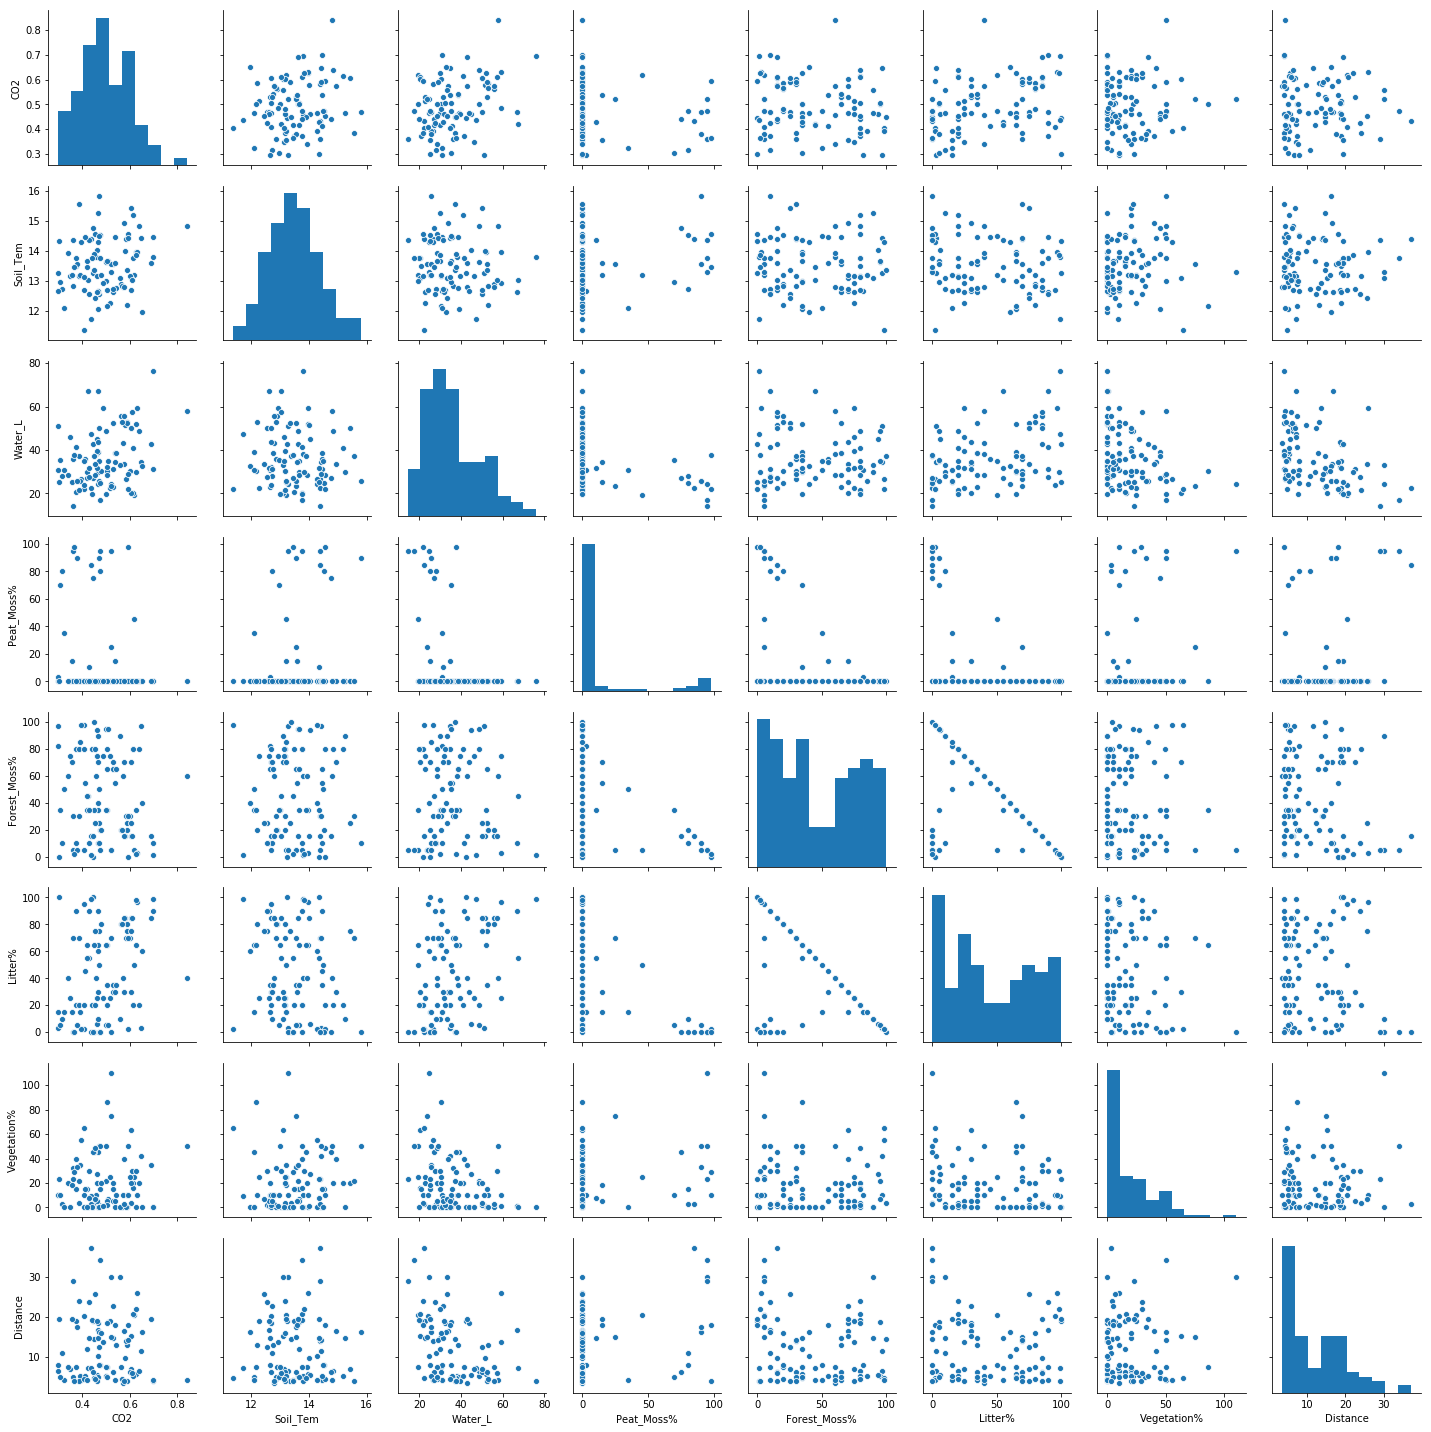

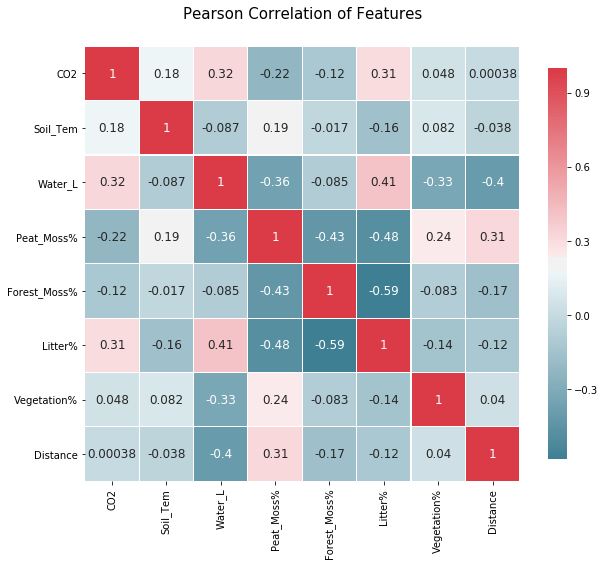

In [11]:
plt.figure(figsize=(10,8))
data_pairplot = data_tino.drop(columns=["Latitude","Longitude","Direction","Treatment","Plot_no"])
sns.pairplot(data_pairplot)
plt.show()

def correlation_heatmap(data):
    fig, ax = plt.subplots(figsize =(10, 8))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    fig = sns.heatmap(data.corr(), cmap = colormap,square=True, cbar_kws={'shrink':.9 }, ax=ax,annot=True,linewidths=0.1,
                      vmax=1.0, linecolor='white',annot_kws={'fontsize':12 })
    plt.title('Pearson Correlation of Features', y=1.05, size=15)
correlation_heatmap(data_pairplot)

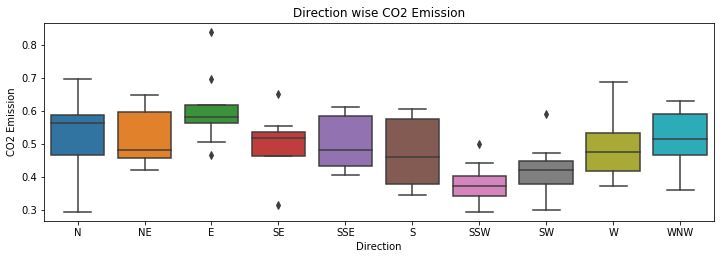

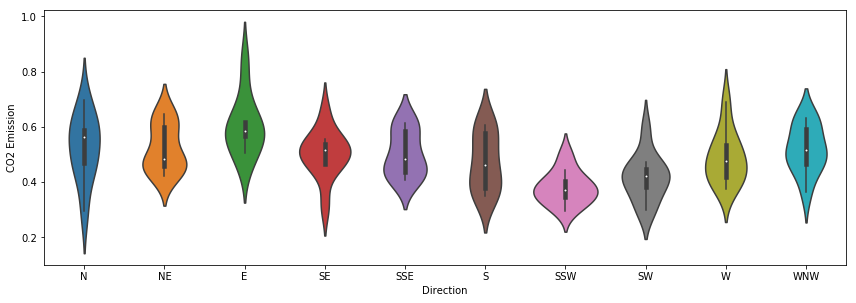

In [12]:
# Box plot and Violin plot

plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
sns.boxplot(x="Direction", y="CO2", data=data_tino)
plt.ylabel("CO2 Emission")
plt.title("Direction wise CO2 Emission")
plt.show()

plt.figure(figsize=(12,8))
plt.subplot(2,1,2)
sns.violinplot(x="Direction", y="CO2", data=data_tino)
plt.ylabel("CO2 Emission")
#plt.title("Direction wise CO2 Emission")
plt.tight_layout()
plt.show()

# Trend of CO2 emission with different factors

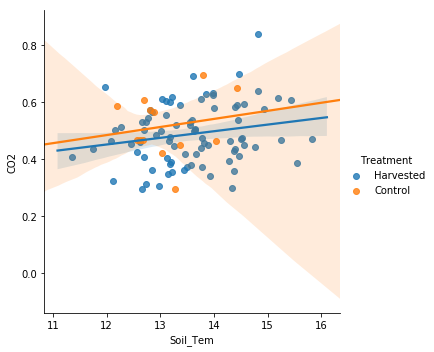

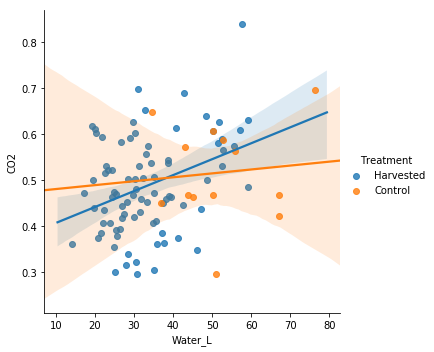

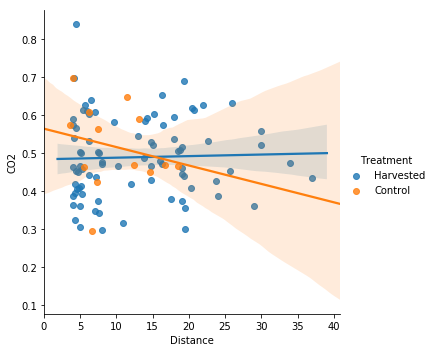

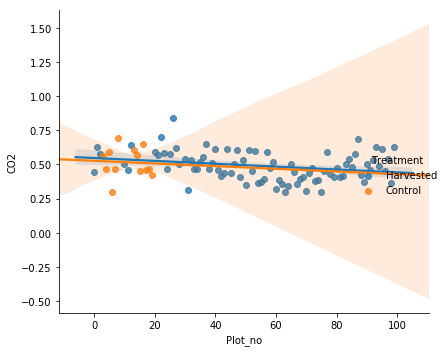

In [13]:
#f, axes = plt.subplots(2, 2, sharey=True, figsize=(12, 10))
sns.lmplot(x="Soil_Tem", y="CO2", hue="Treatment", data=data_tino)
sns.lmplot(x="Water_L", y="CO2", hue="Treatment", data=data_tino)
sns.lmplot(x="Distance", y="CO2",hue="Treatment", data=data_tino )
sns.lmplot(x="Plot_no", y="CO2", hue="Treatment", data=data_tino)
plt.tight_layout()
plt.show()


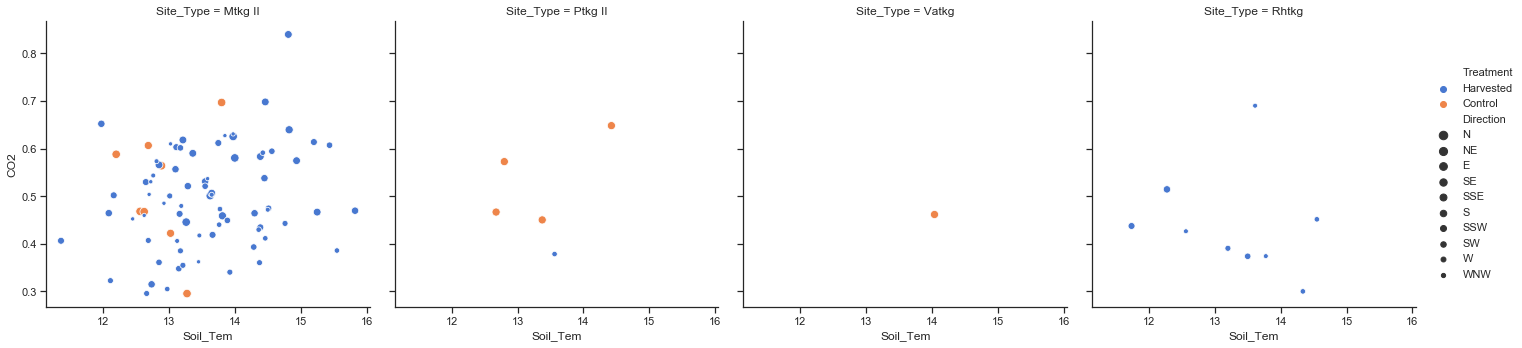

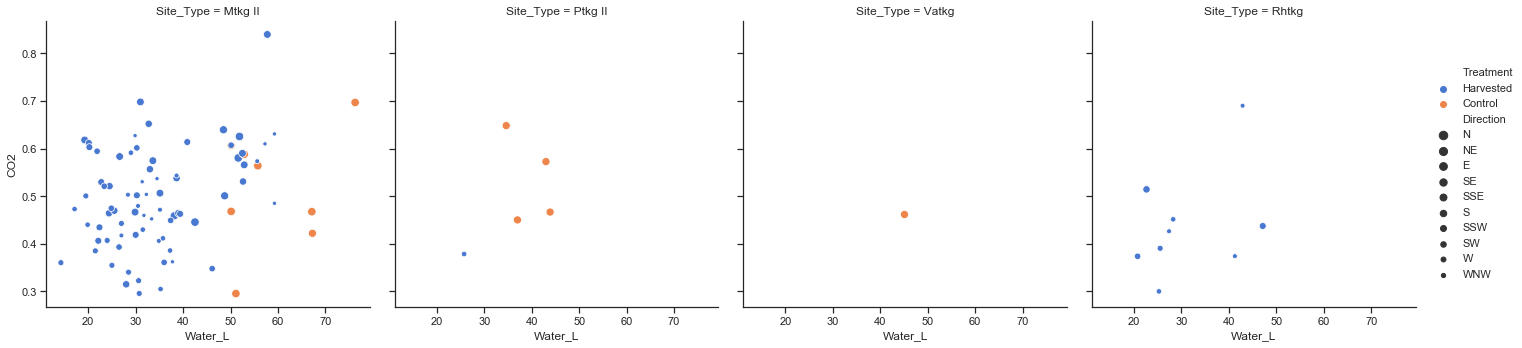

In [14]:
sns.set(style="ticks", palette="muted")
sns.relplot(x="Soil_Tem",y="CO2",col="Site_Type",hue="Treatment", size="Direction",data=data_tino)
plt.show()

sns.set(style="ticks", palette="muted")
sns.relplot(x="Water_L",y="CO2",col="Site_Type", hue="Treatment", size="Direction",data=data_tino)
plt.show()

In [15]:
group_month = lettosuo.groupby("Month")
CO2_Month = group_month["CO2"].mean()
Soil_Month = group_month["Soil_Tem"].mean()

In [16]:
group_month.head()

,Plot_no,Latitude,Longitude,Date,Month,Hours,Mins,CO2,Soil_Tem,Water_L,...,Vaccinium myrtillus,Vaccinium vitis-idaea,Dryopteris carthusiana,Oxalis acetosella,Enpetrum nigrum,Vaccinium oxycoccos,Eriophorum angustifolium,Vaccinium uliginosum,Downy Birtch,Melapuram Sylvaticum
0,0,60.642606,23.957591,20170606,June,16,10,0.243844,12.2,39,...,0,0,0,0,0,0,0,0,0,0
1,1,60.642741,23.957667,20170606,June,16,14,0.518168,12.7,54,...,0,0,0,0,0,0,0,0,0,0
2,2,60.642804,23.957815,20170606,June,16,21,0.375926,14.1,56,...,1,0,0,0,0,0,0,0,0,0
3,3,60.642867,23.958109,20170606,June,16,25,0.375926,11.6,53,...,0,0,0,0,0,0,0,0,0,0
4,4,60.642975,23.958329,20170606,June,16,29,0.274324,11.9,50,...,0,0,0,0,0,0,0,0,0,0
392,0,60.642606,23.957591,20170718,July,15,53,0.469672,13.7,47,...,0,0,0,0,0,0,0,0,0,0
393,1,60.642741,23.957667,20170718,July,15,50,0.663667,14.3,52,...,0,0,0,0,0,0,0,0,0,0
394,2,60.642804,23.957815,20170718,July,15,47,0.581985,14.2,52,...,1,0,0,0,0,0,0,0,0,0
395,3,60.642867,23.958109,20170718,July,15,44,0.612616,13.6,61,...,0,0,0,0,0,0,0,0,0,0
396,4,60.642975,23.958329,20170718,July,15,41,0.520724,12.9,51,...,0,0,0,0,0,0,0,0,0,0


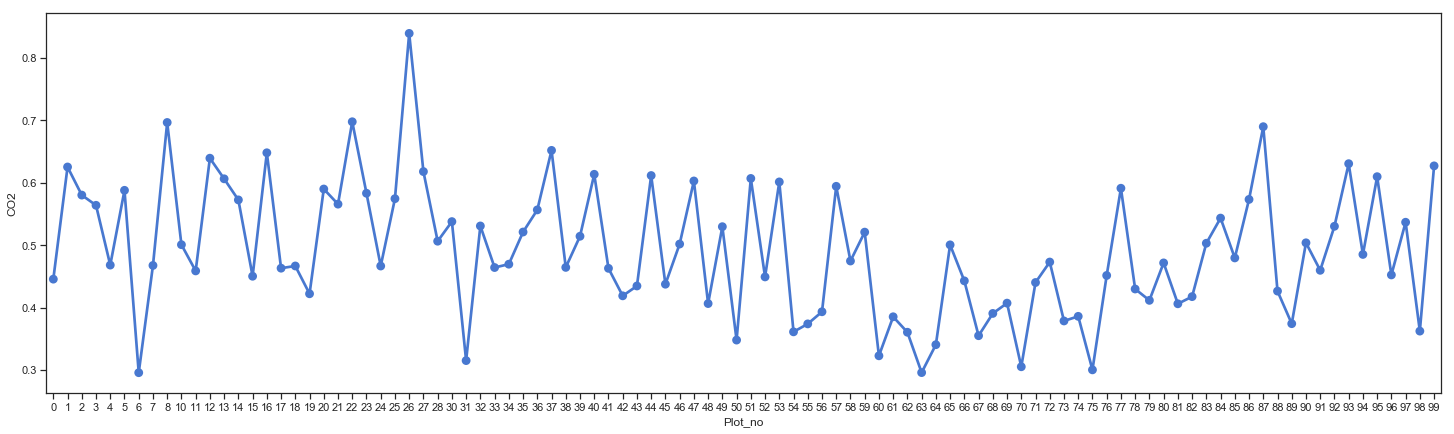

In [17]:
plt.figure(figsize=(25,7))
sns.pointplot(x="Plot_no", y="CO2", data=data_tino)
plt.show()

# Water level

<Figure size 1008x864 with 0 Axes>

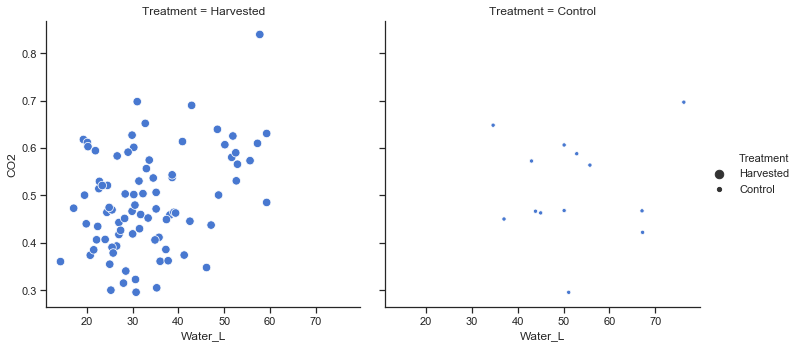

In [18]:
plt.figure(figsize=(14,12))
sns.set(style="ticks", palette="muted")
sns.relplot(x="Water_L",y="CO2",col="Treatment", size="Treatment",data=data_tino)
plt.show()

# Conclusion